In [21]:
using Pkg
Pkg.add(["XLSX", "DataFrames", "Statistics", "Random", "ProgressLogging", "ForwardDiff", "Plots"]) # Installing the necessary packages
using XLSX, DataFrames, Statistics, Random, ProgressLogging, ForwardDiff, Plots



   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [3]:
# Specify the Excel file name
file = "Concrete_Data.xlsx"

# Load the Excel sheet
sheet = XLSX.readtable(file, "Sheet1")

# Create a DataFrame from the sheet
data = DataFrame(sheet)

# Convert all columns to Float64 where possible
for c in names(data)
    try
        data[!, c] = Float64.(data[!, c])
    catch
        # Ignore columns that are not purely numeric (e.g. text columns)
    end
end

# Inspecting the first 5 rows of the dataset
first(data, 5)

Row,Cement (Kg/m3),Blast Furnace Slag (Kg/m3),Fly Ash (Kg/m3),Water (Kg/m3),Superplasticizer (Kg/m3),Coarse Aggregate (Kg/m3),Fine Aggregate (Kg/m3),Age (day),Concrete compressive strength (MPa)
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.9861
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8874
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.2695
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.0528
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.2961


In [4]:
rename!(data, [
    "Cement", "Slag", "FlyAsh", "Water", "Superplasticizer",
    "CoarseAgg", "FineAgg", "Age", "Strength"
])

Row,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.9861
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8874
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.2695
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.0528
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.2961
6,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.0298
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.6983
8,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.4478
9,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.8543


In [5]:
# remove duplicates
data = unique(data)

Row,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.9861
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8874
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.2695
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.0528
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.2961
6,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.0298
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.6983
8,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.4478
9,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.8543


In [6]:
# Normalisieren (Standardisierung)
function standardize(col)
    μ = mean(col)
    σ = std(col)
    return (col .- μ) ./ σ, μ, σ
end

X = Matrix(data[:, 1:8])'
y = data[:, 9]

X_std = similar(X)
μs = Float64[]
σs = Float64[]

for j in 1:size(X,1)
    col, μ, σ = standardize(X[j, :])
    X_std[j,:] = col
    push!(μs, μ)
    push!(σs, σ)
end

In [7]:
# Train/Test split
Random.seed!(123)
n = size(X_std,2)
idx = shuffle(1:n)
train_idx = idx[1:floor(Int,0.8n)]
test_idx  = idx[floor(Int,0.8n)+1:end]

Xtrain = X_std[:, train_idx]
ytrain = y[train_idx]

Xtest = X_std[:, test_idx]
ytest = y[test_idx]

201-element Vector{Float64}:
 47.8151606
 40.7135578
 67.79617508
 66.82401392
 64.90037588
 45.3675208
 32.109882284729316
 34.23937816
 22.435549039999998
 17.96429718
 45.2985732
 33.419591196
 13.461329424
  ⋮
 38.99676256
 20.593958644
 59.89478012
 17.54026944
 39.700028079999996
 32.66047812
  8.374375495999999
 29.231713971999998
 56.63355864
 26.94472208
 61.09446836
 55.064311264

In [18]:
function mse(ŷ, y)
    mean((ŷ .- y).^2)
end

mse (generic function with 2 methods)

In [16]:
function relu(x)
    return max(0,x)
end

relu (generic function with 1 method)

In [9]:
function pack_params(w1, b1, w2, b2)
    return vcat(vec(w1), b1, vec(w2), b2)
end

function unpack_params(p, inputsize, hiddensize, outputsize)
    # counts
    len_w1 = hiddensize * inputsize
    len_b1 = hiddensize
    len_w2 = outputsize * hiddensize
    len_b2 = outputsize

    # slice p
    w1 = reshape(p[1:len_w1], hiddensize, inputsize)
    b1 = p[len_w1+1:len_w1+len_b1]

    offset = len_w1 + len_b1
    w2 = reshape(p[offset+1:offset+len_w2], outputsize, hiddensize)
    b2 = p[offset+len_w2+1:end]

    return w1, b1, w2, b2
end

unpack_params (generic function with 1 method)

In [10]:
function twolayer_regression(x, p)
    w1, b1, w2, b2 = unpack_params(p, size(x,1), 10, 1)

    z1 = w1 * x .+ b1
    a1 = relu.(z1)

    z2 = w2 * a1 .+ b2
    return z2[:]
end

twolayer_regression (generic function with 1 method)

In [11]:
function train!(modelf, errf, p::Vector, x, y, η, nsteps)
    e(p) = errf(modelf(x, p), y)

    for i in 1:nsteps
        g = ForwardDiff.gradient(e, p)
        p .-= η .* g
    end
    return p
end

train! (generic function with 1 method)

In [12]:
inputsize = 8
hiddensize = 10
outputsize = 1

w1 = rand(hiddensize, inputsize) .- 0.5
b1 = rand(hiddensize) .- 0.5
w2 = rand(outputsize, hiddensize) .- 0.5
b2 = rand(outputsize) .- 0.5

p = pack_params(w1, b1, w2, b2)

101-element Vector{Float64}:
 -0.16227367118590275
 -0.28006038081345874
 -0.41736313757177246
  0.21072488029134728
  0.3487078638946295
  0.35665214846952453
  0.38389508205359724
  0.04375979775515282
  0.06657622405497743
  0.39347136295080554
  0.16901802049538273
  0.4428856666956238
 -0.3179340023621551
  ⋮
 -0.45571192607689426
  0.3335597063782584
 -0.48130668057000525
 -0.2884106448979331
 -0.45452749672024406
 -0.10854328684667969
  0.20260493343094643
  0.30277803858919594
  0.2533905149044333
  0.4183421782878729
  0.04959028478751837
 -0.016911164615277974

In [20]:
η = 0.001
nsteps = 5000

p_trained = train!(
    twolayer_regression,
    mse,
    p,
    Xtrain,
    ytrain,
    η,
    nsteps
)


101-element Vector{Float64}:
  1.007226221652923
 -0.0629778072407453
 -0.42523323948447644
 -0.022268891943712774
  0.35308046883785227
  0.46627160618297736
  1.5779649000269078
  0.08570438301630047
  0.717670639817603
 -0.3333600595342458
  0.8834843088377128
 -0.6672322136007491
 -0.6912157833398724
  ⋮
  0.2611997302544912
  6.6526784210145316
 -7.78125867822028
  1.373449510579424
  0.723359023970779
  3.5288894351394737
  1.9765160121299135
  3.123958215206489
  3.1288373925132444
  2.766768110849206
  2.032637326259705
  1.6886167880903036

In [22]:
y_pred_test = twolayer_regression(Xtest, p_trained)

201-element Vector{Float64}:
 46.92168623964257
 36.76961658674185
 62.565191854760656
 54.48618657458042
 68.01696607612503
 51.80187939093823
 35.33587994972813
 20.717269287732492
 25.17317859423887
 20.16406524266573
 47.03589219078908
 40.67181622892152
 23.466739922946072
  ⋮
 37.99488812033628
 18.772097303432936
 61.83231608699496
 16.3633322972866
 37.7497205125102
 28.28140307243124
  9.053917137828805
 32.63780538544521
 48.256338516812804
 28.932587561789287
 59.456962414283616
 41.617343393027866

In [23]:
test_mse = mse(y_pred_test, ytest)
test_rmse = sqrt(test_mse)

println("Test MSE  = $test_mse")
println("Test RMSE = $test_rmse")

Test MSE  = 43.63912527197176
Test RMSE = 6.605991619126667


In [24]:
mae = mean(abs.(y_pred_test .- ytest))
println("Test MAE = $mae")

Test MAE = 5.06875694441163


In [26]:
# R²-Berechnung
ss_res = sum((ytest .- y_pred_test).^2)
ss_tot = sum((ytest .- mean(ytest)).^2)

r2 = 1 - ss_res / ss_tot

println("R² = $r2")

R² = 0.8366643021145281


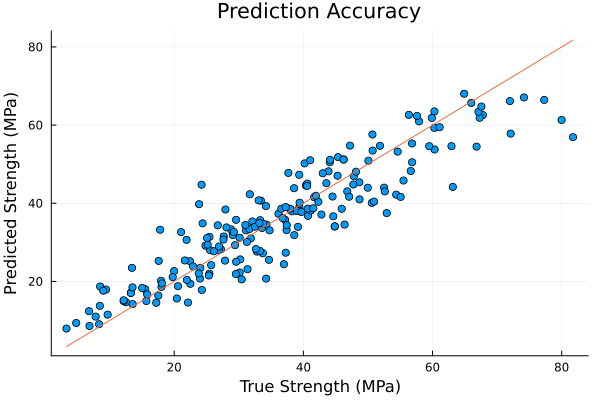

In [25]:
scatter(ytest, y_pred_test,
    xlabel="True Strength (MPa)",
    ylabel="Predicted Strength (MPa)",
    title="Prediction Accuracy",
    legend=false)
plot!(identity, label="Ideal fit")

In [27]:
# --- Training Predictions ---
y_pred_train = twolayer_regression(Xtrain, p_trained)

# --- Training MSE ---
train_mse = mse(y_pred_train, ytrain)

# --- Training RMSE ---
train_rmse = sqrt(train_mse)

# --- Training MAE ---
train_mae = mean(abs.(y_pred_train .- ytrain))

# --- Training R2 ---
ss_res_train = sum((ytrain .- y_pred_train).^2)
ss_tot_train = sum((ytrain .- mean(ytrain)).^2)
train_r2 = 1 - ss_res_train / ss_tot_train

println("Train MSE  = $train_mse")
println("Train RMSE = $train_rmse")
println("Train MAE  = $train_mae")
println("Train R²   = $train_r2")

Train MSE  = 38.53984473536991
Train RMSE = 6.2080467729689275
Train MAE  = 4.777694156331928
Train R²   = 0.8540105826826542
